In [111]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [112]:
import math
import matplotlib.pyplot as plt

In [113]:
def clean_histories(histories):
    train_features = {"step": "step", "training loss": "loss"}
    metric_names = ("rouge1", "rouge2", "rougeL", "rougeLsum", "BLEU", "SARI")
    validation_features = {"validation loss": "eval_loss"}
    
    for validation_feature in ("Generated text length", *metric_names):
        validation_features[validation_feature] = "eval_" + validation_feature
    
    cleaned_data = {}
    
    for model in histories:
        cleaned_data[model] = {}
        for feature in (*train_features, *validation_features):
            cleaned_data[model][feature] = []

    for model, history in histories.items():
        for history_part in history:
            if "loss" in history_part:
                for feature, history_feature in train_features.items():
                    cleaned_data[model][feature].append(history_part[history_feature])
            elif "eval_loss" in history_part:
                for feature, history_feature in validation_features.items():
                    cleaned_data[model][feature].append(history_part[history_feature])    

    for model, history in cleaned_data.items():
        n_measurements = len(history["step"])
        for feature in validation_features:
            cleaned_data[model][feature] = history[feature][:n_measurements]   
    
    return cleaned_data

In [114]:
def plot_generated_texts_length(histories):
    title = "Length of generated simple texts"
    
    for model, history in histories.items():
        plt.plot(history["step"], history["Generated text length"], label=model)
        plt.title(title)
        plt.xlabel("Training steps")
        plt.ylabel("Tokens")
    
    plt.legend()
    plt.savefig(os.path.join("Illustrations", title))
    plt.show()

In [115]:
def plot_losses(histories):
    n = len(histories)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)
    title = "Training and validation losses"
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows), sharey=True)

    for i, (model, loss) in enumerate(histories.items()):
        row = i // ncols
        col = i % ncols
        axs[row][col].plot(loss["step"], loss["training loss"], label="Training Loss")
        axs[row][col].plot(loss["step"], loss["validation loss"], label="Validation Loss")
        axs[row][col].legend()
        axs[row][col].set_title(model)
        axs[row][col].set_xlabel("Training steps")
        axs[row][col].set_ylabel("Loss")
    
    for i in range(len(histories), ncols*nrows):
        row = i // ncols
        col = i % ncols
        axs[row][col].set_visible(False)
    
    fig.suptitle(title)
    plt.savefig(os.path.join("Illustrations", title))
    plt.show()

In [116]:
def plot_metrics(histories):
    metric_names = ("rouge1", "rouge2", "rougeL", "rougeLsum", "BLEU", "SARI")
    n = len(metric_names)
    ncols = math.ceil(math.sqrt(n))
    nrows = math.ceil(n / ncols)
    title = "Metrics"
    fig, axs = plt.subplots(ncols=ncols, nrows=nrows, figsize=(5*ncols, 5*nrows))
    
    for i, metric_name in enumerate(metric_names):
        row = i // ncols
        col = i % ncols
        axs[row][col].set_title(metric_name)
        
        for model, history in histories.items():
            axs[row][col].plot(history["step"], history[metric_name], label=model)
            axs[row][col].legend()
        
        axs[row][col].set_xlabel("Training steps")
        axs[row][col].set_ylabel("Metric")

    fig.suptitle(title)
    plt.savefig(os.path.join("Illustrations", title))
    plt.show()

In [117]:
bart_base_history = [{'loss': 2.0779,
  'learning_rate': 4.7971311475409835e-05,
  'epoch': 0.82,
  'step': 100},
 {'eval_loss': 1.6575886011123657,
  'eval_rouge1': 48.1925,
  'eval_rouge2': 20.3432,
  'eval_rougeL': 30.4483,
  'eval_rougeLsum': 47.1865,
  'eval_BLEU': 14.8016,
  'eval_SARI': 45.8268,
  'eval_Generated text length': 101.6738,
  'eval_runtime': 247.2235,
  'eval_samples_per_second': 2.629,
  'eval_steps_per_second': 0.166,
  'epoch': 0.82,
  'step': 100},
 {'loss': 1.7096,
  'learning_rate': 4.5922131147540986e-05,
  'epoch': 1.64,
  'step': 200},
 {'eval_loss': 1.612496256828308,
  'eval_rouge1': 49.4466,
  'eval_rouge2': 21.003,
  'eval_rougeL': 31.3491,
  'eval_rougeLsum': 48.3269,
  'eval_BLEU': 15.2194,
  'eval_SARI': 46.1963,
  'eval_Generated text length': 99.44,
  'eval_runtime': 218.8108,
  'eval_samples_per_second': 2.971,
  'eval_steps_per_second': 0.187,
  'epoch': 1.64,
  'step': 200},
 {'loss': 1.5793,
  'learning_rate': 4.387295081967213e-05,
  'epoch': 2.46,
  'step': 300},
 {'eval_loss': 1.5895901918411255,
  'eval_rouge1': 49.7849,
  'eval_rouge2': 21.4078,
  'eval_rougeL': 31.5711,
  'eval_rougeLsum': 48.7139,
  'eval_BLEU': 15.3294,
  'eval_SARI': 47.204,
  'eval_Generated text length': 96.7062,
  'eval_runtime': 216.382,
  'eval_samples_per_second': 3.004,
  'eval_steps_per_second': 0.189,
  'epoch': 2.46,
  'step': 300},
 {'loss': 1.4559,
  'learning_rate': 4.182377049180328e-05,
  'epoch': 3.28,
  'step': 400},
 {'eval_loss': 1.604144811630249,
  'eval_rouge1': 50.1902,
  'eval_rouge2': 21.9162,
  'eval_rougeL': 31.8379,
  'eval_rougeLsum': 49.0543,
  'eval_BLEU': 16.555,
  'eval_SARI': 47.3693,
  'eval_Generated text length': 102.8569,
  'eval_runtime': 238.6752,
  'eval_samples_per_second': 2.723,
  'eval_steps_per_second': 0.172,
  'epoch': 3.28,
  'step': 400},
 {'loss': 1.369,
  'learning_rate': 3.9795081967213115e-05,
  'epoch': 4.1,
  'step': 500},
 {'eval_loss': 1.6165376901626587,
  'eval_rouge1': 50.4242,
  'eval_rouge2': 22.1279,
  'eval_rougeL': 32.2203,
  'eval_rougeLsum': 49.2793,
  'eval_BLEU': 16.415,
  'eval_SARI': 47.3554,
  'eval_Generated text length': 101.3969,
  'eval_runtime': 228.3305,
  'eval_samples_per_second': 2.847,
  'eval_steps_per_second': 0.18,
  'epoch': 4.1,
  'step': 500},
 {'train_runtime': 1461.3407,
  'train_samples_per_second': 26.66,
  'train_steps_per_second': 1.67,
  'total_flos': 1467566583275520.0,
  'train_loss': 1.6383584594726563,
  'epoch': 4.1,
  'step': 500},
 {'eval_loss': 1.604144811630249,
  'eval_rouge1': 50.1902,
  'eval_rouge2': 21.9162,
  'eval_rougeL': 31.8379,
  'eval_rougeLsum': 49.0543,
  'eval_BLEU': 16.555,
  'eval_SARI': 47.3693,
  'eval_Generated text length': 102.8569,
  'eval_runtime': 239.698,
  'eval_samples_per_second': 2.712,
  'eval_steps_per_second': 0.171,
  'epoch': 4.1,
  'step': 500},
 {'eval_loss': 1.6068183183670044,
  'eval_rouge1': 50.4142,
  'eval_rouge2': 22.1904,
  'eval_rougeL': 32.1049,
  'eval_rougeLsum': 49.2875,
  'eval_BLEU': 16.4303,
  'eval_SARI': 47.2784,
  'eval_Generated text length': 103.7831,
  'eval_runtime': 241.0791,
  'eval_samples_per_second': 2.696,
  'eval_steps_per_second': 0.17,
  'epoch': 4.1,
  'step': 500}]

In [118]:
t5_small_history = [{'loss': 2.791,
  'learning_rate': 4.799180327868853e-05,
  'epoch': 0.82,
  'step': 100},
 {'eval_loss': 2.226700782775879,
  'eval_rouge1': 26.9448,
  'eval_rouge2': 9.9677,
  'eval_rougeL': 19.3652,
  'eval_rougeLsum': 25.9844,
  'eval_BLEU': 4.4428,
  'eval_SARI': 41.15,
  'eval_Generated text length': 248.6108,
  'eval_runtime': 195.6902,
  'eval_samples_per_second': 3.322,
  'eval_steps_per_second': 0.21,
  'epoch': 0.82,
  'step': 100},
 {'loss': 2.3547,
  'learning_rate': 4.596311475409836e-05,
  'epoch': 1.64,
  'step': 200},
 {'eval_loss': 2.1311252117156982,
  'eval_rouge1': 29.224,
  'eval_rouge2': 10.9908,
  'eval_rougeL': 21.3417,
  'eval_rougeLsum': 28.2709,
  'eval_BLEU': 6.207,
  'eval_SARI': 42.0663,
  'eval_Generated text length': 185.8108,
  'eval_runtime': 179.6805,
  'eval_samples_per_second': 3.618,
  'eval_steps_per_second': 0.228,
  'epoch': 1.64,
  'step': 200},
 {'loss': 2.2792,
  'learning_rate': 4.3913934426229506e-05,
  'epoch': 2.46,
  'step': 300},
 {'eval_loss': 2.0825977325439453,
  'eval_rouge1': 30.6159,
  'eval_rouge2': 11.4876,
  'eval_rougeL': 22.4185,
  'eval_rougeLsum': 29.6575,
  'eval_BLEU': 7.5765,
  'eval_SARI': 42.496,
  'eval_Generated text length': 152.6,
  'eval_runtime': 151.5153,
  'eval_samples_per_second': 4.29,
  'eval_steps_per_second': 0.271,
  'epoch': 2.46,
  'step': 300},
 {'loss': 2.2049,
  'learning_rate': 4.186475409836066e-05,
  'epoch': 3.28,
  'step': 400},
 {'eval_loss': 2.0565054416656494,
  'eval_rouge1': 33.1586,
  'eval_rouge2': 12.9042,
  'eval_rougeL': 23.8185,
  'eval_rougeLsum': 32.2308,
  'eval_BLEU': 8.5116,
  'eval_SARI': 43.2876,
  'eval_Generated text length': 151.3569,
  'eval_runtime': 154.9862,
  'eval_samples_per_second': 4.194,
  'eval_steps_per_second': 0.265,
  'epoch': 3.28,
  'step': 400},
 {'loss': 2.176,
  'learning_rate': 3.98155737704918e-05,
  'epoch': 4.1,
  'step': 500},
 {'eval_loss': 2.0374650955200195,
  'eval_rouge1': 33.4125,
  'eval_rouge2': 13.1933,
  'eval_rougeL': 23.852,
  'eval_rougeLsum': 32.4809,
  'eval_BLEU': 8.4597,
  'eval_SARI': 43.6042,
  'eval_Generated text length': 156.6923,
  'eval_runtime': 152.2373,
  'eval_samples_per_second': 4.27,
  'eval_steps_per_second': 0.269,
  'epoch': 4.1,
  'step': 500},
 {'loss': 2.1507,
  'learning_rate': 3.7766393442622954e-05,
  'epoch': 4.92,
  'step': 600},
 {'eval_loss': 2.020242929458618,
  'eval_rouge1': 32.6863,
  'eval_rouge2': 12.538,
  'eval_rougeL': 23.513,
  'eval_rougeLsum': 31.7513,
  'eval_BLEU': 8.7972,
  'eval_SARI': 43.3502,
  'eval_Generated text length': 139.5462,
  'eval_runtime': 137.8997,
  'eval_samples_per_second': 4.714,
  'eval_steps_per_second': 0.297,
  'epoch': 4.92,
  'step': 600},
 {'loss': 2.1233,
  'learning_rate': 3.57172131147541e-05,
  'epoch': 5.74,
  'step': 700},
 {'eval_loss': 2.0112783908843994,
  'eval_rouge1': 35.0025,
  'eval_rouge2': 13.9307,
  'eval_rougeL': 24.8577,
  'eval_rougeLsum': 34.013,
  'eval_BLEU': 10.0921,
  'eval_SARI': 43.8525,
  'eval_Generated text length': 129.6015,
  'eval_runtime': 124.3117,
  'eval_samples_per_second': 5.229,
  'eval_steps_per_second': 0.33,
  'epoch': 5.74,
  'step': 700},
 {'loss': 2.0924,
  'learning_rate': 3.3668032786885244e-05,
  'epoch': 6.56,
  'step': 800},
 {'eval_loss': 2.002598762512207,
  'eval_rouge1': 35.7042,
  'eval_rouge2': 14.2732,
  'eval_rougeL': 25.1728,
  'eval_rougeLsum': 34.6657,
  'eval_BLEU': 10.3993,
  'eval_SARI': 44.0579,
  'eval_Generated text length': 130.36,
  'eval_runtime': 124.6283,
  'eval_samples_per_second': 5.216,
  'eval_steps_per_second': 0.329,
  'epoch': 6.56,
  'step': 800},
 {'loss': 2.0831,
  'learning_rate': 3.1618852459016395e-05,
  'epoch': 7.38,
  'step': 900},
 {'eval_loss': 1.990784764289856,
  'eval_rouge1': 35.0276,
  'eval_rouge2': 13.8934,
  'eval_rougeL': 24.7776,
  'eval_rougeLsum': 34.0605,
  'eval_BLEU': 10.3228,
  'eval_SARI': 43.9326,
  'eval_Generated text length': 126.3523,
  'eval_runtime': 114.8361,
  'eval_samples_per_second': 5.66,
  'eval_steps_per_second': 0.357,
  'epoch': 7.38,
  'step': 900},
 {'loss': 2.0727,
  'learning_rate': 2.956967213114754e-05,
  'epoch': 8.2,
  'step': 1000},
 {'eval_loss': 1.986069679260254,
  'eval_rouge1': 36.0806,
  'eval_rouge2': 14.5838,
  'eval_rougeL': 25.3544,
  'eval_rougeLsum': 35.1099,
  'eval_BLEU': 10.7078,
  'eval_SARI': 44.4838,
  'eval_Generated text length': 128.4031,
  'eval_runtime': 120.5305,
  'eval_samples_per_second': 5.393,
  'eval_steps_per_second': 0.34,
  'epoch': 8.2,
  'step': 1000},
 {'loss': 2.0525,
  'learning_rate': 2.7520491803278692e-05,
  'epoch': 9.02,
  'step': 1100},
 {'eval_loss': 1.9805359840393066,
  'eval_rouge1': 35.7199,
  'eval_rouge2': 14.2502,
  'eval_rougeL': 25.0855,
  'eval_rougeLsum': 34.7294,
  'eval_BLEU': 10.4208,
  'eval_SARI': 44.2452,
  'eval_Generated text length': 129.2815,
  'eval_runtime': 119.5297,
  'eval_samples_per_second': 5.438,
  'eval_steps_per_second': 0.343,
  'epoch': 9.02,
  'step': 1100},
 {'loss': 2.0438,
  'learning_rate': 2.5471311475409837e-05,
  'epoch': 9.84,
  'step': 1200},
 {'eval_loss': 1.9755843877792358,
  'eval_rouge1': 36.0926,
  'eval_rouge2': 14.2598,
  'eval_rougeL': 25.1502,
  'eval_rougeLsum': 35.0303,
  'eval_BLEU': 10.4975,
  'eval_SARI': 44.2598,
  'eval_Generated text length': 127.6877,
  'eval_runtime': 112.69,
  'eval_samples_per_second': 5.768,
  'eval_steps_per_second': 0.364,
  'epoch': 9.84,
  'step': 1200},
 {'loss': 2.029,
  'learning_rate': 2.3422131147540985e-05,
  'epoch': 10.66,
  'step': 1300},
 {'eval_loss': 1.9715991020202637,
  'eval_rouge1': 36.8654,
  'eval_rouge2': 14.7876,
  'eval_rougeL': 25.713,
  'eval_rougeLsum': 35.8138,
  'eval_BLEU': 10.9756,
  'eval_SARI': 44.4636,
  'eval_Generated text length': 125.7846,
  'eval_runtime': 110.6177,
  'eval_samples_per_second': 5.876,
  'eval_steps_per_second': 0.371,
  'epoch': 10.66,
  'step': 1300},
 {'loss': 2.0239,
  'learning_rate': 2.1372950819672133e-05,
  'epoch': 11.48,
  'step': 1400},
 {'eval_loss': 1.970017671585083,
  'eval_rouge1': 37.305,
  'eval_rouge2': 14.8839,
  'eval_rougeL': 25.9214,
  'eval_rougeLsum': 36.3549,
  'eval_BLEU': 11.2347,
  'eval_SARI': 44.4202,
  'eval_Generated text length': 123.04,
  'eval_runtime': 108.4231,
  'eval_samples_per_second': 5.995,
  'eval_steps_per_second': 0.378,
  'epoch': 11.48,
  'step': 1400},
 {'loss': 1.9948,
  'learning_rate': 1.932377049180328e-05,
  'epoch': 12.3,
  'step': 1500},
 {'eval_loss': 1.9669373035430908,
  'eval_rouge1': 37.8683,
  'eval_rouge2': 15.3596,
  'eval_rougeL': 26.345,
  'eval_rougeLsum': 36.8546,
  'eval_BLEU': 11.8581,
  'eval_SARI': 44.4469,
  'eval_Generated text length': 118.9785,
  'eval_runtime': 96.7889,
  'eval_samples_per_second': 6.716,
  'eval_steps_per_second': 0.424,
  'epoch': 12.3,
  'step': 1500},
 {'loss': 2.0165,
  'learning_rate': 1.7274590163934426e-05,
  'epoch': 13.11,
  'step': 1600},
 {'eval_loss': 1.9608244895935059,
  'eval_rouge1': 36.7987,
  'eval_rouge2': 14.7838,
  'eval_rougeL': 25.7097,
  'eval_rougeLsum': 35.788,
  'eval_BLEU': 10.9525,
  'eval_SARI': 44.4673,
  'eval_Generated text length': 125.8954,
  'eval_runtime': 109.7972,
  'eval_samples_per_second': 5.92,
  'eval_steps_per_second': 0.373,
  'epoch': 13.11,
  'step': 1600},
 {'loss': 1.9887,
  'learning_rate': 1.5225409836065574e-05,
  'epoch': 13.93,
  'step': 1700},
 {'eval_loss': 1.9597386121749878,
  'eval_rouge1': 37.3161,
  'eval_rouge2': 15.0103,
  'eval_rougeL': 25.9341,
  'eval_rougeLsum': 36.3503,
  'eval_BLEU': 11.2872,
  'eval_SARI': 44.4746,
  'eval_Generated text length': 123.3754,
  'eval_runtime': 104.7039,
  'eval_samples_per_second': 6.208,
  'eval_steps_per_second': 0.392,
  'epoch': 13.93,
  'step': 1700},
 {'loss': 1.9983,
  'learning_rate': 1.3176229508196723e-05,
  'epoch': 14.75,
  'step': 1800},
 {'eval_loss': 1.9568997621536255,
  'eval_rouge1': 37.6872,
  'eval_rouge2': 15.2518,
  'eval_rougeL': 26.1978,
  'eval_rougeLsum': 36.6748,
  'eval_BLEU': 11.525,
  'eval_SARI': 44.7712,
  'eval_Generated text length': 122.3108,
  'eval_runtime': 100.3728,
  'eval_samples_per_second': 6.476,
  'eval_steps_per_second': 0.408,
  'epoch': 14.75,
  'step': 1800},
 {'loss': 1.9681,
  'learning_rate': 1.1127049180327869e-05,
  'epoch': 15.57,
  'step': 1900},
 {'eval_loss': 1.9570579528808594,
  'eval_rouge1': 37.5334,
  'eval_rouge2': 15.1793,
  'eval_rougeL': 26.1,
  'eval_rougeLsum': 36.5778,
  'eval_BLEU': 11.3999,
  'eval_SARI': 44.6218,
  'eval_Generated text length': 123.6046,
  'eval_runtime': 106.4239,
  'eval_samples_per_second': 6.108,
  'eval_steps_per_second': 0.385,
  'epoch': 15.57,
  'step': 1900},
 {'train_runtime': 3068.7061,
  'train_samples_per_second': 12.696,
  'train_steps_per_second': 0.795,
  'total_flos': 2527351653531648.0,
  'train_loss': 2.128611128957648,
  'epoch': 15.57,
  'step': 1900},
 {'eval_loss': 1.9568997621536255,
  'eval_rouge1': 37.6872,
  'eval_rouge2': 15.2518,
  'eval_rougeL': 26.1978,
  'eval_rougeLsum': 36.6748,
  'eval_BLEU': 11.525,
  'eval_SARI': 44.7712,
  'eval_Generated text length': 122.3108,
  'eval_runtime': 100.6309,
  'eval_samples_per_second': 6.459,
  'eval_steps_per_second': 0.407,
  'epoch': 15.57,
  'step': 1900},
 {'eval_loss': 1.9588016271591187,
  'eval_rouge1': 37.5573,
  'eval_rouge2': 15.2255,
  'eval_rougeL': 26.2032,
  'eval_rougeLsum': 36.6787,
  'eval_BLEU': 12.1396,
  'eval_SARI': 44.1714,
  'eval_Generated text length': 119.3677,
  'eval_runtime': 99.9563,
  'eval_samples_per_second': 6.503,
  'eval_steps_per_second': 0.41,
  'epoch': 15.57,
  'step': 1900}]

In [119]:
t5_base_history = [{'loss': 2.5115,
  'learning_rate': 4.8975409836065575e-05,
  'epoch': 0.41,
  'step': 100},
 {'eval_loss': 1.8153151273727417,
  'eval_rouge1': 25.8765,
  'eval_rouge2': 9.7372,
  'eval_rougeL': 18.5719,
  'eval_rougeLsum': 25.0487,
  'eval_BLEU': 4.2325,
  'eval_SARI': 42.2401,
  'eval_Generated text length': 258.2846,
  'eval_runtime': 629.2869,
  'eval_samples_per_second': 1.033,
  'eval_steps_per_second': 0.13,
  'epoch': 0.41,
  'step': 100},
 {'loss': 1.9029,
  'learning_rate': 4.796106557377049e-05,
  'epoch': 0.82,
  'step': 200},
 {'eval_loss': 1.7350130081176758,
  'eval_rouge1': 28.7401,
  'eval_rouge2': 11.6502,
  'eval_rougeL': 20.4785,
  'eval_rougeLsum': 28.0187,
  'eval_BLEU': 5.3475,
  'eval_SARI': 43.9381,
  'eval_Generated text length': 232.9769,
  'eval_runtime': 627.2322,
  'eval_samples_per_second': 1.036,
  'eval_steps_per_second': 0.131,
  'epoch': 0.82,
  'step': 200},
 {'loss': 1.8172,
  'learning_rate': 4.6946721311475414e-05,
  'epoch': 1.23,
  'step': 300},
 {'eval_loss': 1.7027231454849243,
  'eval_rouge1': 32.3272,
  'eval_rouge2': 13.5914,
  'eval_rougeL': 22.6495,
  'eval_rougeLsum': 31.5542,
  'eval_BLEU': 6.1586,
  'eval_SARI': 44.9021,
  'eval_Generated text length': 224.0877,
  'eval_runtime': 606.3404,
  'eval_samples_per_second': 1.072,
  'eval_steps_per_second': 0.135,
  'epoch': 1.23,
  'step': 300},
 {'loss': 1.7586,
  'learning_rate': 4.5922131147540986e-05,
  'epoch': 1.64,
  'step': 400},
 {'eval_loss': 1.6804405450820923,
  'eval_rouge1': 32.1988,
  'eval_rouge2': 13.4421,
  'eval_rougeL': 22.5748,
  'eval_rougeLsum': 31.3823,
  'eval_BLEU': 6.5019,
  'eval_SARI': 44.9485,
  'eval_Generated text length': 213.2908,
  'eval_runtime': 592.6846,
  'eval_samples_per_second': 1.097,
  'eval_steps_per_second': 0.138,
  'epoch': 1.64,
  'step': 400},
 {'loss': 1.7231,
  'learning_rate': 4.489754098360656e-05,
  'epoch': 2.05,
  'step': 500},
 {'eval_loss': 1.6653406620025635,
  'eval_rouge1': 35.043,
  'eval_rouge2': 14.8573,
  'eval_rougeL': 24.6775,
  'eval_rougeLsum': 34.2088,
  'eval_BLEU': 8.0396,
  'eval_SARI': 45.0963,
  'eval_Generated text length': 179.4046,
  'eval_runtime': 533.645,
  'eval_samples_per_second': 1.218,
  'eval_steps_per_second': 0.154,
  'epoch': 2.05,
  'step': 500},
 {'loss': 1.676,
  'learning_rate': 4.387295081967213e-05,
  'epoch': 2.46,
  'step': 600},
 {'eval_loss': 1.65348482131958,
  'eval_rouge1': 38.1298,
  'eval_rouge2': 16.3816,
  'eval_rougeL': 26.4315,
  'eval_rougeLsum': 37.2854,
  'eval_BLEU': 9.5885,
  'eval_SARI': 45.9404,
  'eval_Generated text length': 162.7815,
  'eval_runtime': 494.975,
  'eval_samples_per_second': 1.313,
  'eval_steps_per_second': 0.166,
  'epoch': 2.46,
  'step': 600},
 {'loss': 1.6255,
  'learning_rate': 4.284836065573771e-05,
  'epoch': 2.87,
  'step': 700},
 {'eval_loss': 1.648362398147583,
  'eval_rouge1': 36.8032,
  'eval_rouge2': 15.735,
  'eval_rougeL': 25.3735,
  'eval_rougeLsum': 36.0024,
  'eval_BLEU': 8.5727,
  'eval_SARI': 45.6487,
  'eval_Generated text length': 179.0062,
  'eval_runtime': 528.249,
  'eval_samples_per_second': 1.23,
  'eval_steps_per_second': 0.155,
  'epoch': 2.87,
  'step': 700},
 {'loss': 1.5818,
  'learning_rate': 4.182377049180328e-05,
  'epoch': 3.28,
  'step': 800},
 {'eval_loss': 1.6449706554412842,
  'eval_rouge1': 40.4335,
  'eval_rouge2': 17.3804,
  'eval_rougeL': 27.8094,
  'eval_rougeLsum': 39.5278,
  'eval_BLEU': 10.8644,
  'eval_SARI': 46.2851,
  'eval_Generated text length': 152.9754,
  'eval_runtime': 446.8996,
  'eval_samples_per_second': 1.454,
  'eval_steps_per_second': 0.183,
  'epoch': 3.28,
  'step': 800},
 {'loss': 1.5616,
  'learning_rate': 4.0799180327868855e-05,
  'epoch': 3.69,
  'step': 900},
 {'eval_loss': 1.635146141052246,
  'eval_rouge1': 40.6188,
  'eval_rouge2': 17.4912,
  'eval_rougeL': 27.9136,
  'eval_rougeLsum': 39.7422,
  'eval_BLEU': 12.0214,
  'eval_SARI': 46.2451,
  'eval_Generated text length': 136.34,
  'eval_runtime': 383.6565,
  'eval_samples_per_second': 1.694,
  'eval_steps_per_second': 0.214,
  'epoch': 3.69,
  'step': 900},
 {'loss': 1.5556,
  'learning_rate': 3.977459016393443e-05,
  'epoch': 4.1,
  'step': 1000},
 {'eval_loss': 1.6414873600006104,
  'eval_rouge1': 43.288,
  'eval_rouge2': 18.7345,
  'eval_rougeL': 29.4282,
  'eval_rougeLsum': 42.3842,
  'eval_BLEU': 13.4929,
  'eval_SARI': 46.5577,
  'eval_Generated text length': 129.3892,
  'eval_runtime': 359.9032,
  'eval_samples_per_second': 1.806,
  'eval_steps_per_second': 0.228,
  'epoch': 4.1,
  'step': 1000},
 {'loss': 1.5063,
  'learning_rate': 3.8760245901639344e-05,
  'epoch': 4.51,
  'step': 1100},
 {'eval_loss': 1.636047601699829,
  'eval_rouge1': 41.9559,
  'eval_rouge2': 18.1172,
  'eval_rougeL': 28.7069,
  'eval_rougeLsum': 41.0357,
  'eval_BLEU': 12.2487,
  'eval_SARI': 46.512,
  'eval_Generated text length': 136.9108,
  'eval_runtime': 419.3937,
  'eval_samples_per_second': 1.55,
  'eval_steps_per_second': 0.196,
  'epoch': 4.51,
  'step': 1100},
 {'loss': 1.5123,
  'learning_rate': 3.773565573770492e-05,
  'epoch': 4.92,
  'step': 1200},
 {'eval_loss': 1.6289434432983398,
  'eval_rouge1': 40.9063,
  'eval_rouge2': 17.8781,
  'eval_rougeL': 28.0671,
  'eval_rougeLsum': 40.0418,
  'eval_BLEU': 11.6467,
  'eval_SARI': 46.7343,
  'eval_Generated text length': 146.6538,
  'eval_runtime': 427.2914,
  'eval_samples_per_second': 1.521,
  'eval_steps_per_second': 0.192,
  'epoch': 4.92,
  'step': 1200},
 {'loss': 1.4587,
  'learning_rate': 3.6711065573770495e-05,
  'epoch': 5.33,
  'step': 1300},
 {'eval_loss': 1.6370849609375,
  'eval_rouge1': 43.5292,
  'eval_rouge2': 19.2067,
  'eval_rougeL': 29.5713,
  'eval_rougeLsum': 42.5847,
  'eval_BLEU': 13.3885,
  'eval_SARI': 46.9263,
  'eval_Generated text length': 129.7154,
  'eval_runtime': 372.7628,
  'eval_samples_per_second': 1.744,
  'eval_steps_per_second': 0.22,
  'epoch': 5.33,
  'step': 1300},
 {'train_runtime': 7185.0774,
  'train_samples_per_second': 5.422,
  'train_steps_per_second': 0.679,
  'total_flos': 3453980610355200.0,
  'train_loss': 1.7070039602426381,
  'epoch': 5.33,
  'step': 1300},
 {'eval_loss': 1.6289434432983398,
  'eval_rouge1': 40.9063,
  'eval_rouge2': 17.8781,
  'eval_rougeL': 28.0671,
  'eval_rougeLsum': 40.0418,
  'eval_BLEU': 11.6467,
  'eval_SARI': 46.7343,
  'eval_Generated text length': 146.6538,
  'eval_runtime': 429.2086,
  'eval_samples_per_second': 1.514,
  'eval_steps_per_second': 0.191,
  'epoch': 5.33,
  'step': 1300},
 {'eval_loss': 1.6236543655395508,
  'eval_rouge1': 41.8334,
  'eval_rouge2': 18.4783,
  'eval_rougeL': 28.4659,
  'eval_rougeLsum': 40.9309,
  'eval_BLEU': 12.1444,
  'eval_SARI': 46.5778,
  'eval_Generated text length': 144.3262,
  'eval_runtime': 411.4006,
  'eval_samples_per_second': 1.58,
  'eval_steps_per_second': 0.199,
  'epoch': 5.33,
  'step': 1300}]

In [120]:
flan_t5_small_history = [{'loss': 2.3605,
  'learning_rate': 4.795081967213115e-05,
  'epoch': 0.82,
  'step': 100},
 {'eval_loss': 2.035810947418213,
  'eval_rouge1': 11.5237,
  'eval_rouge2': 3.9963,
  'eval_rougeL': 9.2081,
  'eval_rougeLsum': 11.0203,
  'eval_BLEU': 1.5309,
  'eval_SARI': 39.7966,
  'eval_Generated text length': 464.02,
  'eval_runtime': 280.2818,
  'eval_samples_per_second': 2.319,
  'eval_steps_per_second': 0.146,
  'epoch': 0.82,
  'step': 100},
 {'loss': 2.1886,
  'learning_rate': 4.59016393442623e-05,
  'epoch': 1.64,
  'step': 200},
 {'eval_loss': 1.9713761806488037,
  'eval_rouge1': 13.9665,
  'eval_rouge2': 5.0969,
  'eval_rougeL': 10.7863,
  'eval_rougeLsum': 13.3975,
  'eval_BLEU': 1.8765,
  'eval_SARI': 40.8043,
  'eval_Generated text length': 438.34,
  'eval_runtime': 276.9207,
  'eval_samples_per_second': 2.347,
  'eval_steps_per_second': 0.148,
  'epoch': 1.64,
  'step': 200},
 {'loss': 2.1232,
  'learning_rate': 4.3852459016393444e-05,
  'epoch': 2.46,
  'step': 300},
 {'eval_loss': 1.9345595836639404,
  'eval_rouge1': 14.1959,
  'eval_rouge2': 5.2476,
  'eval_rougeL': 11.1412,
  'eval_rougeLsum': 13.6592,
  'eval_BLEU': 1.9246,
  'eval_SARI': 41.1234,
  'eval_Generated text length': 436.7446,
  'eval_runtime': 268.5444,
  'eval_samples_per_second': 2.42,
  'eval_steps_per_second': 0.153,
  'epoch': 2.46,
  'step': 300},
 {'loss': 2.0615,
  'learning_rate': 4.1803278688524595e-05,
  'epoch': 3.28,
  'step': 400},
 {'eval_loss': 1.9208407402038574,
  'eval_rouge1': 18.0577,
  'eval_rouge2': 6.957,
  'eval_rougeL': 13.665,
  'eval_rougeLsum': 17.4267,
  'eval_BLEU': 2.4242,
  'eval_SARI': 41.6018,
  'eval_Generated text length': 393.9369,
  'eval_runtime': 266.5741,
  'eval_samples_per_second': 2.438,
  'eval_steps_per_second': 0.154,
  'epoch': 3.28,
  'step': 400},
 {'loss': 2.0339,
  'learning_rate': 3.975409836065574e-05,
  'epoch': 4.1,
  'step': 500},
 {'eval_loss': 1.9028059244155884,
  'eval_rouge1': 16.4892,
  'eval_rouge2': 6.3206,
  'eval_rougeL': 12.6716,
  'eval_rougeLsum': 15.9642,
  'eval_BLEU': 2.2734,
  'eval_SARI': 41.7078,
  'eval_Generated text length': 414.8,
  'eval_runtime': 268.5681,
  'eval_samples_per_second': 2.42,
  'eval_steps_per_second': 0.153,
  'epoch': 4.1,
  'step': 500},
 {'loss': 2.0109,
  'learning_rate': 3.7704918032786885e-05,
  'epoch': 4.92,
  'step': 600},
 {'eval_loss': 1.8906344175338745,
  'eval_rouge1': 17.2329,
  'eval_rouge2': 6.6211,
  'eval_rougeL': 13.1367,
  'eval_rougeLsum': 16.6327,
  'eval_BLEU': 2.4053,
  'eval_SARI': 41.8154,
  'eval_Generated text length': 396.5538,
  'eval_runtime': 267.967,
  'eval_samples_per_second': 2.426,
  'eval_steps_per_second': 0.153,
  'epoch': 4.92,
  'step': 600},
 {'loss': 1.989,
  'learning_rate': 3.5655737704918037e-05,
  'epoch': 5.74,
  'step': 700},
 {'eval_loss': 1.8818427324295044,
  'eval_rouge1': 18.9542,
  'eval_rouge2': 7.3482,
  'eval_rougeL': 14.3106,
  'eval_rougeLsum': 18.302,
  'eval_BLEU': 2.6569,
  'eval_SARI': 42.1676,
  'eval_Generated text length': 375.9446,
  'eval_runtime': 265.9607,
  'eval_samples_per_second': 2.444,
  'eval_steps_per_second': 0.154,
  'epoch': 5.74,
  'step': 700},
 {'loss': 1.9601,
  'learning_rate': 3.360655737704918e-05,
  'epoch': 6.56,
  'step': 800},
 {'eval_loss': 1.879463791847229,
  'eval_rouge1': 21.2941,
  'eval_rouge2': 8.2859,
  'eval_rougeL': 15.7662,
  'eval_rougeLsum': 20.5488,
  'eval_BLEU': 3.0523,
  'eval_SARI': 42.5786,
  'eval_Generated text length': 354.0769,
  'eval_runtime': 265.7076,
  'eval_samples_per_second': 2.446,
  'eval_steps_per_second': 0.154,
  'epoch': 6.56,
  'step': 800},
 {'loss': 1.9461,
  'learning_rate': 3.155737704918033e-05,
  'epoch': 7.38,
  'step': 900},
 {'eval_loss': 1.869574785232544,
  'eval_rouge1': 19.9271,
  'eval_rouge2': 7.7158,
  'eval_rougeL': 14.8705,
  'eval_rougeLsum': 19.2628,
  'eval_BLEU': 2.8413,
  'eval_SARI': 42.4109,
  'eval_Generated text length': 365.9277,
  'eval_runtime': 265.8467,
  'eval_samples_per_second': 2.445,
  'eval_steps_per_second': 0.154,
  'epoch': 7.38,
  'step': 900},
 {'loss': 1.9321,
  'learning_rate': 2.9508196721311478e-05,
  'epoch': 8.2,
  'step': 1000},
 {'eval_loss': 1.8637003898620605,
  'eval_rouge1': 19.231,
  'eval_rouge2': 7.484,
  'eval_rougeL': 14.4512,
  'eval_rougeLsum': 18.6052,
  'eval_BLEU': 2.7901,
  'eval_SARI': 42.691,
  'eval_Generated text length': 373.1954,
  'eval_runtime': 266.5044,
  'eval_samples_per_second': 2.439,
  'eval_steps_per_second': 0.154,
  'epoch': 8.2,
  'step': 1000},
 {'loss': 1.9203,
  'learning_rate': 2.7459016393442626e-05,
  'epoch': 9.02,
  'step': 1100},
 {'eval_loss': 1.860918402671814,
  'eval_rouge1': 20.0031,
  'eval_rouge2': 7.7743,
  'eval_rougeL': 14.9816,
  'eval_rougeLsum': 19.3362,
  'eval_BLEU': 2.8827,
  'eval_SARI': 42.4798,
  'eval_Generated text length': 360.1862,
  'eval_runtime': 268.0794,
  'eval_samples_per_second': 2.425,
  'eval_steps_per_second': 0.153,
  'epoch': 9.02,
  'step': 1100},
 {'loss': 1.9083,
  'learning_rate': 2.540983606557377e-05,
  'epoch': 9.84,
  'step': 1200},
 {'eval_loss': 1.8555442094802856,
  'eval_rouge1': 19.4608,
  'eval_rouge2': 7.4981,
  'eval_rougeL': 14.5913,
  'eval_rougeLsum': 18.829,
  'eval_BLEU': 2.8199,
  'eval_SARI': 42.4853,
  'eval_Generated text length': 365.4446,
  'eval_runtime': 267.5741,
  'eval_samples_per_second': 2.429,
  'eval_steps_per_second': 0.153,
  'epoch': 9.84,
  'step': 1200},
 {'loss': 1.8914,
  'learning_rate': 2.336065573770492e-05,
  'epoch': 10.66,
  'step': 1300},
 {'eval_loss': 1.854892611503601,
  'eval_rouge1': 22.0545,
  'eval_rouge2': 8.6279,
  'eval_rougeL': 16.3372,
  'eval_rougeLsum': 21.3153,
  'eval_BLEU': 3.3099,
  'eval_SARI': 42.9329,
  'eval_Generated text length': 330.1338,
  'eval_runtime': 265.3893,
  'eval_samples_per_second': 2.449,
  'eval_steps_per_second': 0.154,
  'epoch': 10.66,
  'step': 1300},
 {'loss': 1.8873,
  'learning_rate': 2.1311475409836064e-05,
  'epoch': 11.48,
  'step': 1400},
 {'eval_loss': 1.8531841039657593,
  'eval_rouge1': 21.7309,
  'eval_rouge2': 8.4213,
  'eval_rougeL': 16.2257,
  'eval_rougeLsum': 21.0607,
  'eval_BLEU': 3.2544,
  'eval_SARI': 42.7193,
  'eval_Generated text length': 330.3338,
  'eval_runtime': 265.6151,
  'eval_samples_per_second': 2.447,
  'eval_steps_per_second': 0.154,
  'epoch': 11.48,
  'step': 1400},
 {'loss': 1.86,
  'learning_rate': 1.9262295081967212e-05,
  'epoch': 12.3,
  'step': 1500},
 {'eval_loss': 1.8538165092468262,
  'eval_rouge1': 24.7596,
  'eval_rouge2': 9.882,
  'eval_rougeL': 18.0461,
  'eval_rougeLsum': 23.9708,
  'eval_BLEU': 3.8809,
  'eval_SARI': 43.5322,
  'eval_Generated text length': 306.6723,
  'eval_runtime': 265.4161,
  'eval_samples_per_second': 2.449,
  'eval_steps_per_second': 0.154,
  'epoch': 12.3,
  'step': 1500},
 {'train_runtime': 4555.467,
  'train_samples_per_second': 8.552,
  'train_steps_per_second': 0.536,
  'total_flos': 2740871260225536.0,
  'train_loss': 2.004877421061198,
  'epoch': 12.3,
  'step': 1500},
 {'eval_loss': 1.8531841039657593,
  'eval_rouge1': 21.7309,
  'eval_rouge2': 8.4213,
  'eval_rougeL': 16.2257,
  'eval_rougeLsum': 21.0607,
  'eval_BLEU': 3.2544,
  'eval_SARI': 42.7193,
  'eval_Generated text length': 330.3338,
  'eval_runtime': 265.8721,
  'eval_samples_per_second': 2.445,
  'eval_steps_per_second': 0.154,
  'epoch': 12.3,
  'step': 1500},
 {'eval_loss': 1.853136658668518,
  'eval_rouge1': 21.0938,
  'eval_rouge2': 8.6068,
  'eval_rougeL': 15.7264,
  'eval_rougeLsum': 20.5319,
  'eval_BLEU': 3.393,
  'eval_SARI': 42.819,
  'eval_Generated text length': 336.5785,
  'eval_runtime': 268.032,
  'eval_samples_per_second': 2.425,
  'eval_steps_per_second': 0.153,
  'epoch': 12.3,
  'step': 1500}]

In [121]:
led_base_history = [{'loss': 1.9021,
  'learning_rate': 4.898565573770492e-05,
  'epoch': 0.41,
  'step': 100},
 {'eval_loss': 1.670123815536499,
  'eval_rouge1': 18.429,
  'eval_rouge2': 7.0734,
  'eval_rougeL': 13.6649,
  'eval_rougeLsum': 17.9383,
  'eval_BLEU': 3.2379,
  'eval_SARI': 44.2521,
  'eval_Generated text length': 393.2785,
  'eval_runtime': 321.8985,
  'eval_samples_per_second': 2.019,
  'eval_steps_per_second': 0.255,
  'epoch': 0.41,
  'step': 100},
 {'loss': 1.6735,
  'learning_rate': 4.796106557377049e-05,
  'epoch': 0.82,
  'step': 200},
 {'eval_loss': 1.6200377941131592,
  'eval_rouge1': 28.9338,
  'eval_rouge2': 11.6238,
  'eval_rougeL': 20.3679,
  'eval_rougeLsum': 28.2387,
  'eval_BLEU': 5.4201,
  'eval_SARI': 45.0383,
  'eval_Generated text length': 276.28,
  'eval_runtime': 312.2238,
  'eval_samples_per_second': 2.082,
  'eval_steps_per_second': 0.263,
  'epoch': 0.82,
  'step': 200},
 {'loss': 1.4957,
  'learning_rate': 4.693647540983607e-05,
  'epoch': 1.23,
  'step': 300},
 {'eval_loss': 1.6099926233291626,
  'eval_rouge1': 36.3943,
  'eval_rouge2': 15.3123,
  'eval_rougeL': 24.9416,
  'eval_rougeLsum': 35.6411,
  'eval_BLEU': 8.6577,
  'eval_SARI': 45.8914,
  'eval_Generated text length': 197.0923,
  'eval_runtime': 266.0834,
  'eval_samples_per_second': 2.443,
  'eval_steps_per_second': 0.308,
  'epoch': 1.23,
  'step': 300},
 {'loss': 1.366,
  'learning_rate': 4.591188524590164e-05,
  'epoch': 1.64,
  'step': 400},
 {'eval_loss': 1.590561866760254,
  'eval_rouge1': 39.4028,
  'eval_rouge2': 16.7347,
  'eval_rougeL': 26.8887,
  'eval_rougeLsum': 38.5853,
  'eval_BLEU': 10.3347,
  'eval_SARI': 47.0716,
  'eval_Generated text length': 175.8185,
  'eval_runtime': 255.4977,
  'eval_samples_per_second': 2.544,
  'eval_steps_per_second': 0.321,
  'epoch': 1.64,
  'step': 400},
 {'loss': 1.3354,
  'learning_rate': 4.4887295081967215e-05,
  'epoch': 2.05,
  'step': 500},
 {'eval_loss': 1.6325347423553467,
  'eval_rouge1': 43.1034,
  'eval_rouge2': 18.4976,
  'eval_rougeL': 28.9513,
  'eval_rougeLsum': 42.2868,
  'eval_BLEU': 12.2966,
  'eval_SARI': 47.5556,
  'eval_Generated text length': 159.2031,
  'eval_runtime': 216.5933,
  'eval_samples_per_second': 3.001,
  'eval_steps_per_second': 0.379,
  'epoch': 2.05,
  'step': 500},
 {'train_runtime': 1989.6441,
  'train_samples_per_second': 19.581,
  'train_steps_per_second': 2.453,
  'total_flos': 717220813897728.0,
  'train_loss': 1.5545281982421875,
  'epoch': 2.05,
  'step': 500},
 {'eval_loss': 1.590561866760254,
  'eval_rouge1': 39.4028,
  'eval_rouge2': 16.7347,
  'eval_rougeL': 26.8887,
  'eval_rougeLsum': 38.5853,
  'eval_BLEU': 10.3347,
  'eval_SARI': 47.0716,
  'eval_Generated text length': 175.8185,
  'eval_runtime': 253.7053,
  'eval_samples_per_second': 2.562,
  'eval_steps_per_second': 0.323,
  'epoch': 2.05,
  'step': 500},
 {'eval_loss': 1.5938878059387207,
  'eval_rouge1': 40.5213,
  'eval_rouge2': 17.4026,
  'eval_rougeL': 27.7246,
  'eval_rougeLsum': 39.6004,
  'eval_BLEU': 11.17,
  'eval_SARI': 47.3387,
  'eval_Generated text length': 171.6385,
  'eval_runtime': 241.8858,
  'eval_samples_per_second': 2.687,
  'eval_steps_per_second': 0.339,
  'epoch': 2.05,
  'step': 500}]

In [122]:
histories = {
    "bart-base": bart_base_history,
    "t5-small": t5_small_history,
    "t5-base": t5_base_history,
    "flan-t5-small": flan_t5_small_history,
    "led-base": led_base_history
}

In [123]:
os.mkdir("Illustrations")

FileExistsError: [Errno 17] File exists: 'Illustrations'

In [124]:
cleaned_histories = clean_histories(histories)

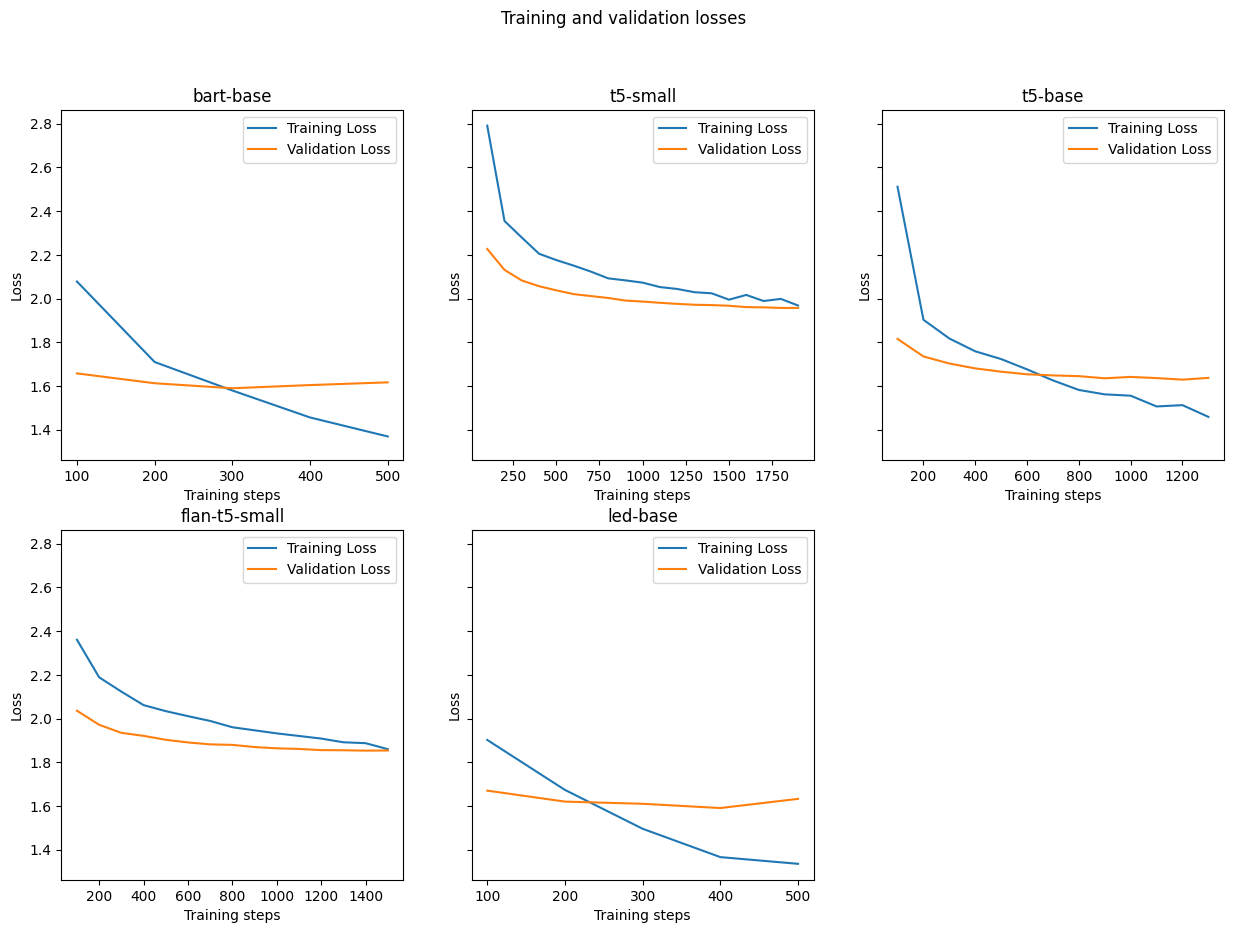

In [125]:
plot_losses(cleaned_histories)

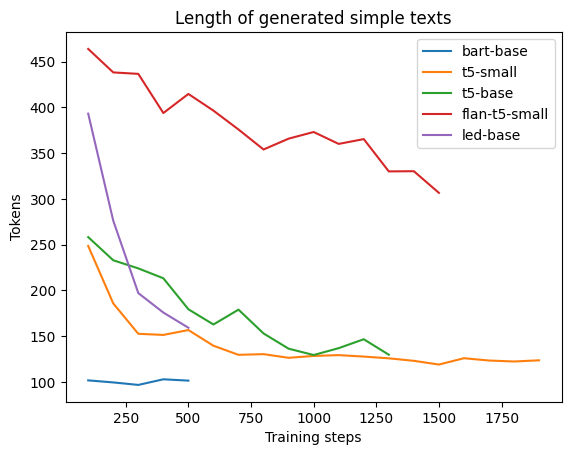

In [126]:
plot_generated_texts_length(cleaned_histories)

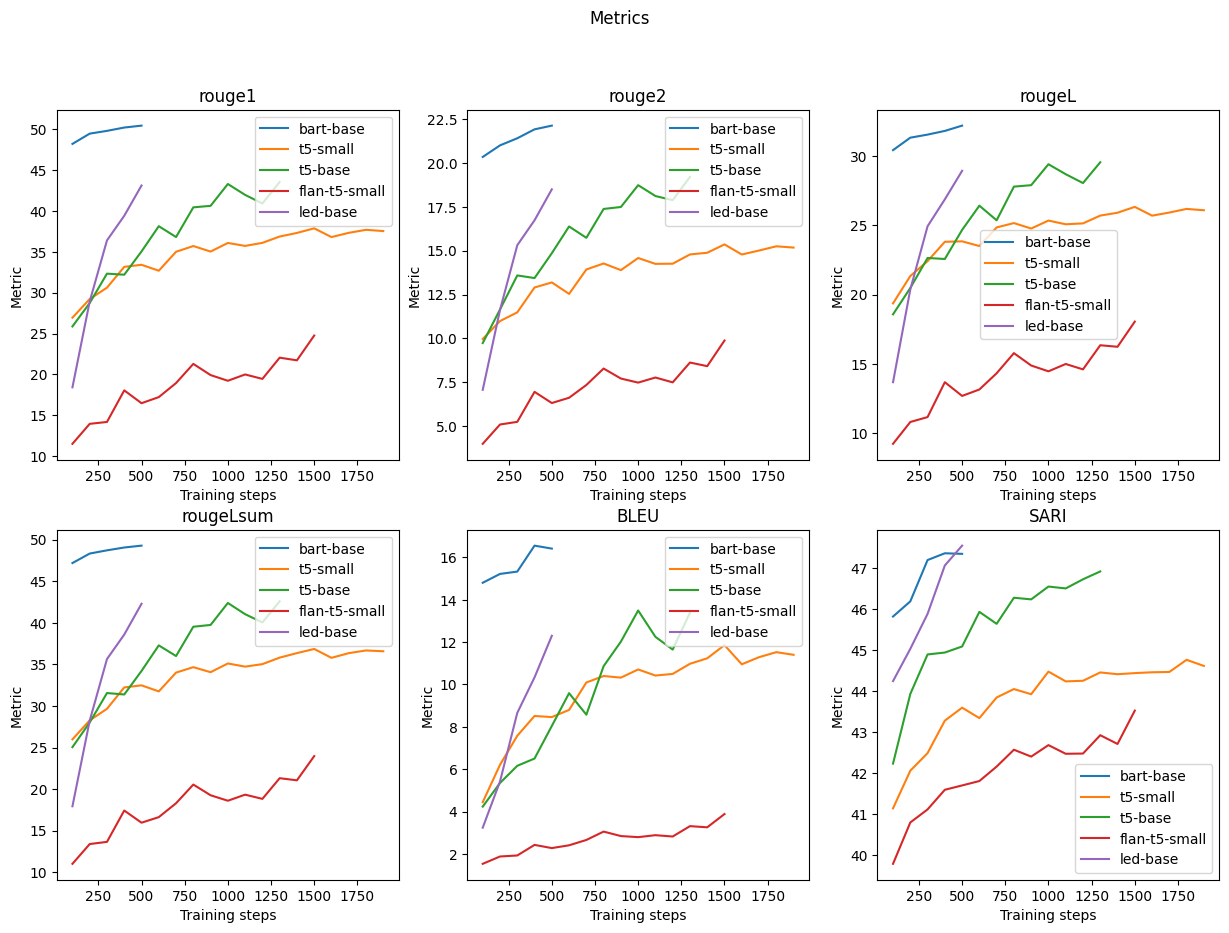

In [127]:
plot_metrics(cleaned_histories)